In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
import pandas as pd

class seq2point(nn.Module):

    def __init__(self, model_params: dict):
        """
        This class is created to specify the Seq2Point Network.
        Refer to "ZHANG C, ZHONG M, WANG Z, et al. Sequence-to-point learning with neural networks for non-intrusive load monitoring.
        The 32nd AAAI Conference on Artificial Intelligence"

        Parameters 
        ----------
        model_params : dictionary
            provides the model with the required input channels, output channels, kernel size, stride and padding values
            
            model_params = 
                {
                    'CONV_LAYERS': int,
                    'INPUT_CHANNELS': list(int),
                    'LEFT_PAD': list(int),
                    'RIGHT_PAD': list(int),
                    'OUTPUT_CHANNELS': list(int),
                    'KERNEL': list(int),
                    'STRIDE': int,
                    'PADDING': int,
                    'SEQUENCE_LENGTH': int
                }
        """
        try:
            display("Initializing seq2point model archiecture")
            super(seq2point, self).__init__()
            
            assert model_params['SEQUENCE_LENGTH'] >= 599, f"Provided sequence length is {model_params['SEQUENCE_LENGTH']} while it should be atleast >=599"
            layers = []
            
            for layer in range(0, model_params['CONV_LAYERS']):
                layers.append(
                    nn.ConstantPad1d(
                        padding=(model_params['LEFT_PAD'][layer], 
                                 model_params['RIGHT_PAD'][layer]), value=0))
                layers.append(
                    nn.Conv1d(
                        in_channels=model_params['INPUT_CHANNELS'][layer], 
                        out_channels=model_params['OUTPUT_CHANNELS'][layer], 
                        kernel_size=model_params['KERNEL'][layer],
                        stride=model_params['STRIDE'], 
                        padding=model_params['PADDING']))
                layers.append(nn.ReLU(inplace=True))
            
            layers.append(
                nn.Linear(
                    in_features=50 * model_params['SEQUENCE_LENGTH'], 
                    out_features=1024))
            layers.append(
                nn.ReLU(inplace=True))
            layers.append(
                nn.Linear(
                    in_features=1024, 
                    out_features=1))

            self.layers = nn.Sequential(*layers)

        except Exception:
            raise 

    def forward(self, x):
        """
        """
        try:
            print(type(x))
            return self.layers(x)

        except Exception as e:
            print('Error occured in forward method due to ', e)
    
    def save_model(self, filename):
        """
        Save the best model to the disk.
        """
        try:
            print('Saving the model...')
            torch.save(self.state_dict(), os.path.join(model_config['SAVE_PATH'],f'{filename}.pt'))
            
        except Exception as e:
            print("Error occured in save_model method due to ", e)
    
    def load_model(self):
        """
        """
        try:
            print('Loading the model...')
            self.load_state_dict(torch.load(os.path.join(model_config['SAVE_PATH'],model_config['LOAD_MODEL'])))
        
        except Exception as e:
            print(f"Error occured in load_model method due to ", e)

#     def load_networks(self, epoch):
#         """Load all the networks from the disk.
#         """
#         for name in self.network_names:
#             if isinstance(name, str):
#                 load_filename = '{0}_net_{1}.pth'.format(epoch, name)
#                 load_path = os.path.join(self.save_dir, load_filename)
#                 net = getattr(self, 'net' + name)
#                 if isinstance(net, torch.nn.DataParallel):
#                     net = net.module
#                 print('loading the model from {0}'.format(load_path))
#                 state_dict = torch.load(load_path, map_location=self.device)
#                 if hasattr(state_dict, '_metadata'):
#                     del state_dict._metadata

#                 net.load_state_dict(state_dict)
    

In [19]:
def initialize_weights(layer): #torch.nn.modules
    """
    Initializing weights using Xavier Initialization for every Conv1D and Linear Layer
        
    Parameters
    ----------
    layer : torch.nn.modules
    
    """
    try:
        if isinstance(layer, nn.Conv1d) or isinstance(layer, nn.Linear):
            torch.nn.init.xavier_uniform_(layer.weight.data)
            if layer.bias is not None:
                torch.nn.init.constant_(layer.bias.data, val=0.0)     
            
    except Exception as e:
        print("Error occured in initialize_weights method due to ", e)
        
def set_optimization():
    """
    """
    
    try:
        return training_config['OPTIMIZER'](model.parameters(), lr=training_config['LEARNING_RATE'])
    
    except Exception as e:
        print("Error occured in set_optimization method due to ", e)
        
def set_criterion():
    """
    """
    
    try:
        return training_config['LOSS'](reduction=training_config['LOSS_REDUCTION'])
    
    except Exception as e:
        print("Error occured in set_criterion method due to ", e)
        
def set_GPU():
    """
    """
    try:
        return torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    except Exception as e:
        print("Error occured in set_GPU_flag method due to ", e)
        
def early_stopping(idle_training_epochs):
    """
    """
    try:
        if idle_training_epochs == training_config['EARLY_STOPPING_THRESHOLD']:
            print("Earlystopping is calling it off because validation loss did not improve after {} epochs, therefore e".format(idle_training_epochs))
            return True 
    
    except Exception as e:
        print("Error occured in early_stopping method due to ", e)
        

In [20]:
def load_dataset():
    """
    """
    try:
        data = pd.read_csv(data_config['DATA_PATH'])
        return data
        
    except Exception as e:
        print("Error occured in load_dataset method due to ", e)

In [20]:
from torchsummary import summary
import time
# summary(model, (1,599)) ## in progress
import numpy as np
from torch.utils.tensorboard import SummaryWriter


KeyboardInterrupt



In [ ]:
def network_training():
    """
    """
    try:
        training_loss_per_epoch = []
        validation_loss_per_epoch = []
        best_loss, idle_training_epochs = None, 0
        writer = SummaryWriter(comment='training_visuaization')

        for epoch in range(0, training_config['NUM_EPOCHS']):

            if early_stopping(idle_training_epochs):
                break

            model.train()
            start_training_time = time.time() 
            train_loss_scores = []
            validation_loss_scores= []

            for batch_idx, (data, target) in enumerate(train_loader):
                data = data.to(set_GPU())

                # predictions = model.forward(data.to(set_GPU()))
                predictions = torch.randn(1,1)

                loss = criterion(predictions.to(set_GPU()), target.to(set_GPU()))
                train_loss_scores.append(loss.item())
                
                # optimizer.zero_grad()
                # loss.backward()
                # optimizer.step()

                # if (batch_idx+1) % 100 == 0:
                #     print(f"Epoch : [{epoch+1}/{training_config['NUM_EPOCHS']}] | Step : [{batch_index+1}/{len(train_loader)}] | Loss : {loss.item()}")
            
            training_loss_per_epoch.append(np.min(train_loss_scores))
            
            model.eval()
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(validation_loader):
                    data = data.to(set_GPU())
                    
                    # predictions = model.forward(data.to(set_GPU()))
                    predictions = torch.randn(1,1)
                    
                    loss = criterion(predictions.to(set_GPU()), target.to(set_GPU()))
                    validation_loss_scores.append(loss.item())
                    
            validation_loss_per_epoch.append(np.min(validation_loss_scores))
            
            end_training_time = time.time()
            print(f"Epoch : [{epoch}/{training_config['NUM_EPOCHS']}] | Training Loss : {training_loss_per_epoch[-1]}, | Validation Loss : {validation_loss_per_epoch[-1]}, | \
                  Time consumption: {end_training_time-start_training_time}s")
            
            if best_loss is None:
                best_loss = validation_loss_per_epoch[-1]
            elif best_loss > validation_loss_per_epoch[-1]:
                best_loss = validation_loss_per_epoch[-1]
                idle_training_epochs = 0
                model.save_model(filename=f"{best_loss}")  
            else:
                idle_training_epochs +=1
            
            for name,param in model.named_parameters():
                pass
                # writer.add_histogram(name + '_grad', param.grad, epoch)
                # writer.add_histogram(name + '_data', param, epoch)
            writer.add_scalars("Bleh", {"Check":best_loss}, epoch)
        
        return training_loss_per_epoch, validation_loss_per_epoch
    
    except Exception as e:
        print("Error occured in network_training method due to ", e)
            

In [23]:
training_config = {
    'TRAIN_BATCH_SIZE' : 64,
    'LEARNING_RATE' : 0.001,
    'NUM_EPOCHS' : 1,
    'OPTIMIZER': optim.Adam,
    'LOSS': nn.MSELoss,
    'LOSS_REDUCTION': 'mean',
    'EARLY_STOPPING_THRESHOLD': 3,
}

model_config = {
    'PRE-TRAINED_MODEL_FLAG': False,
    'SAVE_PATH': "../models/",
    'LOAD_MODEL': "0.0014488688902929425.pt",
}

model_params = {
        'CONV_LAYERS': 5,
        'INPUT_CHANNELS': [1, 30, 30, 40, 50],
        'LEFT_PAD': [4, 3, 2, 2, 2],
        'RIGHT_PAD': [5, 4, 3, 2, 2],
        'OUTPUT_CHANNELS': [30, 30, 40, 50, 50],
        'KERNEL': [10, 8, 6, 5, 5],
        'STRIDE': 1,
        'PADDING': 0,
        'SEQUENCE_LENGTH': 599
}

dataset_config = {
        'DATA_PATH': "../data/", 
}



model = seq2point(model_params).to(set_GPU())

if not model_config['PRE-TRAINED_MODEL_FLAG']:
    model.apply(initialize_weights)
    summary(model, (1,599)) ## in progress

    criterion = set_criterion()
    optimizer = set_optimization()

    train_loader = torch.randn(5,2)
    validation_loader = torch.randn(2,2)

    train_loss, validation_loss = network_training()

else:
    model.load_model()
    summary(model, (1,599)) ## in progress

    

'Initializing seq2point model archiecture'

<class 'torch.Tensor'>
Error occured in forward method due to  mat1 and mat2 shapes cannot be multiplied (100x599 and 29950x1024)
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        []                        --
|    └─ConstantPad1d: 2-1                [-1, 1, 608]              --
|    └─Conv1d: 2-2                       [-1, 30, 599]             330
|    └─ReLU: 2-3                         [-1, 30, 599]             --
|    └─ConstantPad1d: 2-4                [-1, 30, 606]             --
|    └─Conv1d: 2-5                       [-1, 30, 599]             7,230
|    └─ReLU: 2-6                         [-1, 30, 599]             --
|    └─ConstantPad1d: 2-7                [-1, 30, 604]             --
|    └─Conv1d: 2-8                       [-1, 40, 599]             7,240
|    └─ReLU: 2-9                         [-1, 40, 599]             --
|    └─ConstantPad1d: 2-10               [-1, 40, 603]             --
|    └─Conv1d: 2-1

In [15]:
dataset=load_dataset()
dataset

Error occured in load_dataset method due to  name 'data_config' is not defined


In [16]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np

writer = SummaryWriter()

for n_iter in range(100):
    writer.add_scalar('Loss/train', np.random.random(), n_iter)
    writer.add_scalar('Loss/test', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/train', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/test', np.random.random(), n_iter)

In [ ]:
! tensorboard --logdir=runs

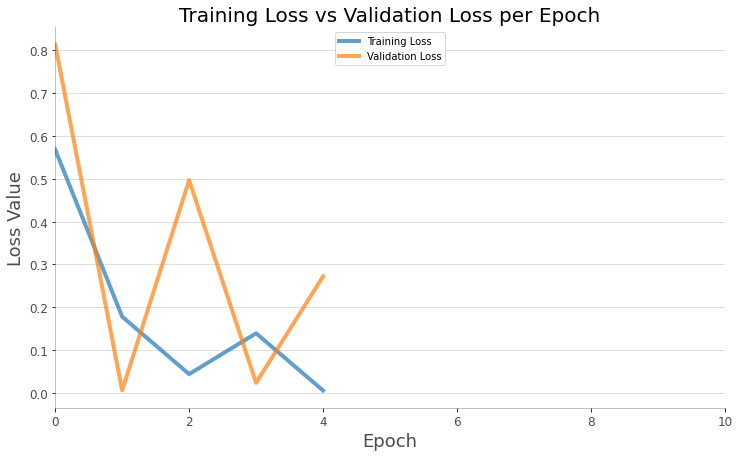

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'Training Loss':train_loss, 'Validation Loss':validation_loss})
df.plot(linewidth=4, alpha=0.7, figsize=(12,7), label='Loss')
plt.xlim([0,10])
# plt.ylim(-20,100)
plt.title('Training Loss vs Validation Loss per Epoch', fontsize=20)
plt.grid(axis='y', alpha=.5)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
plt.xlabel('Epoch', fontsize=18, alpha=.7)
plt.ylabel('Loss Value', fontsize=18, alpha=.7)
# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper center')
plt.show()

In [ ]:
def inference():
    """
    """
    try:
        model.eval()
        start_test_time = time.time()
        test_scores = []
        with torch.no_grad():
            for batc_idx, (data, target) in enumerate(test_loader):
                data = data.to(set_device)
                
                predictions = model.forward(data)
        
                ## progress test_scores.append()
                
        end_test_time = time.time()
        print(f"Testing Loss : {training_loss_per_epoch[-1]}, Time consumption: {end_test_time-start_test_time}s")
            
        
    except Exception as e:
            print('Error occured in inference method due to ', e)

In [19]:
a = 0

assert a==True, f'a is not True'


AssertionError: a is not True